# Distance Matrix Metrics

There ara a few different distance metrics which can generate slightly different mosaics.

In [1]:
from phomo import METRICS
for metric, func in METRICS.items():
    print(f"{metric}: {func.__doc__}\n")

greyscale: Compute the greyscale distance.

    This metric ignores colours and compares greyscale values. Should provide better
    photomosaics when using few tiles images.


    Args:
        master_chunk: array containing the RGB pixels with values between 0 and 255.
        tile_arrays: array tile pixel arrays, values between 0 and 255.
        **kwargs: passed to ``np.linalg.norm``.

    Returns:
        Colour distance approximation between the master chunk and all the tiles
            arrays.
    

norm: Distance metric using ``np.linalg.norm``.

    Quick distance metric in RGB space.

    Args:
        master_chunk: array containing the RGB pixels with values between 0 and 255.
        tile_arrays: list of tile pixel arrays, values between 0 and 255.
        **kwargs: passed to ``np.linalg.norm``.

    Returns:
        Colour distance approximation between the master chunk and all the tiles
            arrays.
    

luv_approx: Distance metric using a L*U*V space approximati

/home/lcoyle/.cache/pypoetry/virtualenvs/phomo-pX3Qwu7w-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from phomo import Mosaic, Master, Pool

In [3]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))

Loading tiles: 100%|█████████████████████████████████████████████████████████████████| 9780/9780 [00:04<00:00, 2090.45it/s]


In [4]:
from pathlib import Path

master_file = list(Path("faces").glob('*'))[3732]

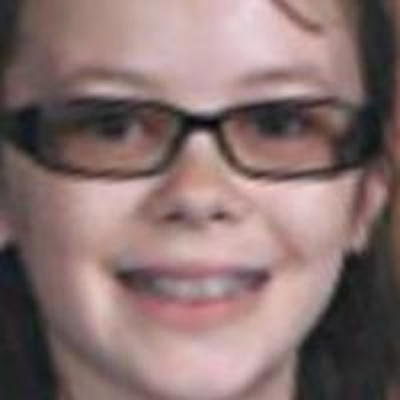

In [5]:
master = Master.from_file(master_file, img_size=(400, 400))
master.img

In [6]:
mosaic = Mosaic(master, pool)

## All the different metrics

Let's go through the different distance metrics.

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 101250.55it/s]


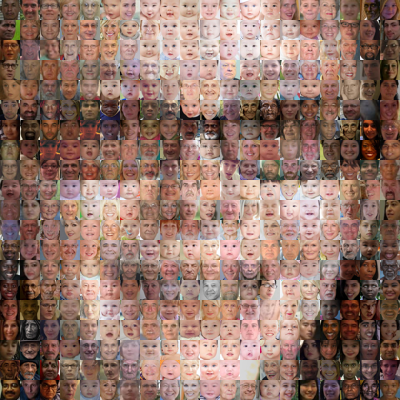

In [7]:
mosaic.build(mosaic.d_matrix(metric="norm"))

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 249252.95it/s]


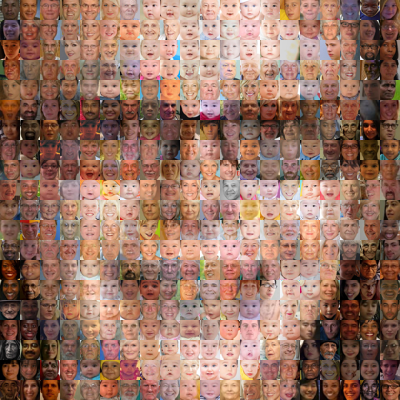

In [8]:
mosaic.build(mosaic.d_matrix(metric="greyscale"))

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 164692.41it/s]


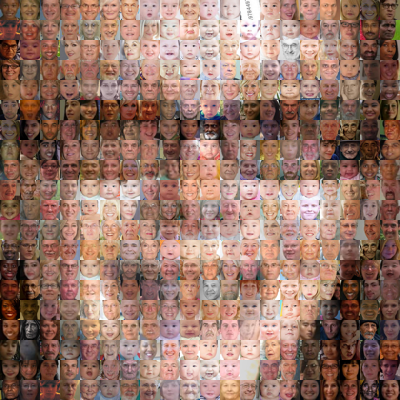

In [9]:
mosaic.build(mosaic.d_matrix(metric="luv_approx"))

### Changing the parameters of `np.linalg.norm`

When using the `"norm"` we can also control the parameters of the `np.linalg.norm` function.

This results in slightly different mosaics.

See the numpy docs:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 240430.15it/s]


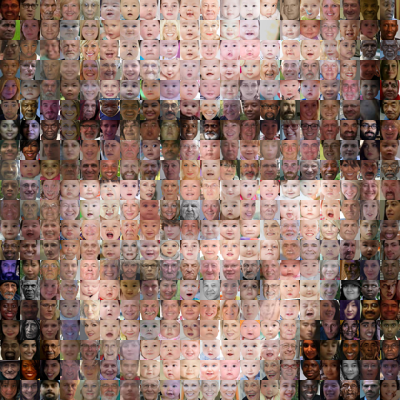

In [10]:
mosaic.build(mosaic.d_matrix(metric="norm", ord=1))

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 254315.84it/s]


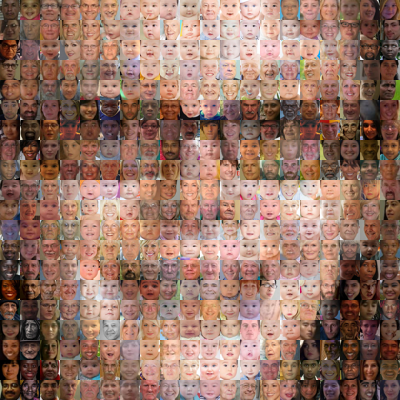

In [11]:
mosaic.build(mosaic.d_matrix(metric="norm", ord=2))

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 203532.89it/s]


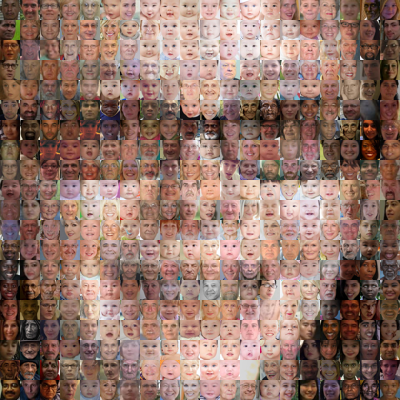

In [12]:
mosaic.build(mosaic.d_matrix(metric="norm", ord="fro"))

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 236165.77it/s]


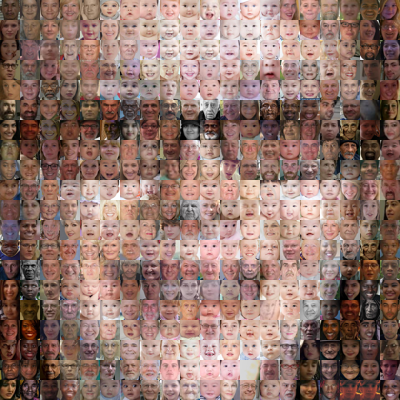

In [13]:
mosaic.build(mosaic.d_matrix(metric="norm", ord="nuc"))

## GPU metrics

When using GPU acceleration through `Mosaic.d_matrix_cuda` only `"norm"` and `"greyscale"` are supported.

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 180886.43it/s]


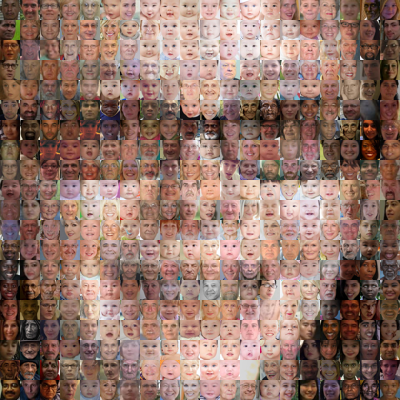

In [14]:
mosaic.build(mosaic.d_matrix_cuda(metric="norm"))

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 264249.74it/s]


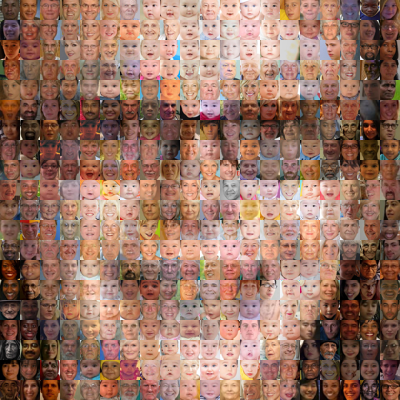

In [15]:
mosaic.build(mosaic.d_matrix_cuda(metric="greyscale"))